In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dir = os.path.join("Train") 

test_dir = os.path.join("Test") 

In [3]:
train_datagen = ImageDataGenerator(

      # compressions of pixels b/w 0.1
      rescale=1./255,

      # fix random rotations of images b/w 0 to 180 degrees
      rotation_range=40,

      # horizontal and vertical scrolling of the image
      width_shift_range=0.2,

      # horizontal and vertical scrolling ration of the image
      height_shift_range=0.2,

      # buckling process
      shear_range=0.2,

      # zoom level
      zoom_range=0.2,

      # vertical image rotation
      horizontal_flip=True,

      # Excess after processing 
      # determines how image points are filled
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(

        # target directory
        train_dir,

        # inages will be resized to (150x150)
        target_size=(200, 200),

        # stack size
        batch_size=64,

        # as we use binary_crossentropy, we need binary tags
        class_mode='binary')

Found 4320 images belonging to 2 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=64,

        class_mode='binary')

Found 1080 images belonging to 2 classes.


Label :  0.0


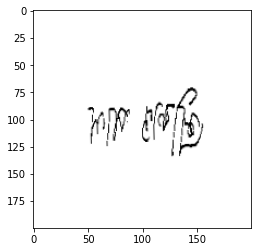

In [6]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


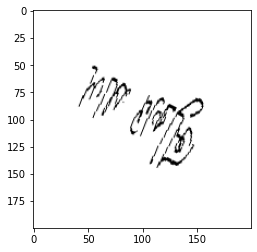

In [7]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

In [8]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    
    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
    self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
    self.flatten = tf.keras.layers.Flatten()
    
    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    
    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    
    return x
model = MyModel()

In [9]:
input_shape = (None, 200, 200, 3)
model.build(input_shape)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  448       
                                                                 
 conv2d_1 (Conv2D)           multiple                  4640      
                                                                 
 conv2d_2 (Conv2D)           multiple                  4624      
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  308314624 
                                                                 
 dense_1 (Dense)             multiple                  513       
                                                                 
Total params: 308,324,849
Trainable params: 308,324,849
No

In [10]:
model.compile(
    # loss function
    loss="binary_crossentropy",
    
    # Optimization:
    # Considering the loss created by the data, which is the input of our network,
    # we have a self-update mechanism
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

    # metrics
    metrics=["acc"])

C:\Users\Khushi Tanna\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
history = model.fit_generator(

  
    train_generator,

    
    steps_per_epoch=train_generator.samples//train_generator.batch_size,

   
    epochs=40,

    verbose=2)

C:\Users\KHUSHI~1\AppData\Local\Temp/ipykernel_16208/966569255.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40
67/67 - 297s - loss: 1.1354 - acc: 0.5164 - 297s/epoch - 4s/step
Epoch 2/40
67/67 - 291s - loss: 0.7228 - acc: 0.5268 - 291s/epoch - 4s/step
Epoch 3/40
67/67 - 282s - loss: 0.7067 - acc: 0.5343 - 282s/epoch - 4s/step
Epoch 4/40
67/67 - 290s - loss: 0.7086 - acc: 0.5439 - 290s/epoch - 4s/step
Epoch 5/40
67/67 - 297s - loss: 0.6843 - acc: 0.5587 - 297s/epoch - 4s/step
Epoch 6/40
67/67 - 290s - loss: 0.6679 - acc: 0.5893 - 290s/epoch - 4s/step
Epoch 7/40
67/67 - 295s - loss: 0.6728 - acc: 0.5853 - 295s/epoch - 4s/step
Epoch 8/40
67/67 - 351s - loss: 0.6682 - acc: 0.5949 - 351s/epoch - 5s/step
Epoch 9/40
67/67 - 304s - loss: 0.6623 - acc: 0.6034 - 304s/epoch - 5s/step
Epoch 10/40
67/67 - 292s - loss: 0.6597 - acc: 0.6067 - 292s/epoch - 4s/step
Epoch 11/40
67/67 - 286s - loss: 0.6536 - acc: 0.6116 - 286s/epoch - 4s/step
Epoch 12/40
67/67 - 291s - loss: 0.6499 - acc: 0.6255 - 291s/epoch - 4s/step
Epoch 13/40
67/67 - 312s - loss: 0.6462 - acc: 0.6264 - 312s/epoch - 5s/step
Epoch 14

Label :  0.0
Predict :  0.0


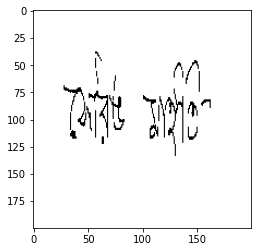

In [12]:
plt.imshow(test_generator[0][0][5])
print("Label : ",test_generator[0][1][5])

test_input = test_generator[0][0][5]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  1.0
Predict :  0.0


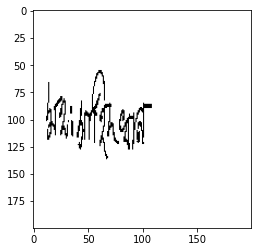

In [13]:
plt.imshow(test_generator[0][0][30])
print("Label : ",test_generator[0][1][30])

test_input = test_generator[0][0][30]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  0.0
Predict :  0.0


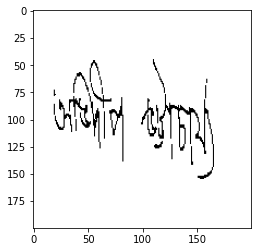

In [14]:
plt.imshow(test_generator[0][0][50])
print("Label : ",test_generator[0][1][50])

test_input = test_generator[0][0][50]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  0.0
Predict :  0.0


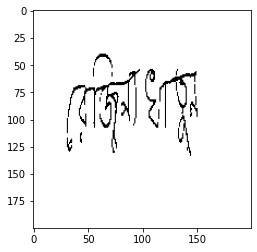

In [17]:
plt.imshow(test_generator[0][0][55])
print("Label : ",test_generator[0][1][55])

test_input = test_generator[0][0][55]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))